# Lab 1

 Chouliaras Andreas 2143
 
 Pappas Apostolos 2109
 
 Gkountouvas Stylianos 1973

# Παράδειγμα 1

In [1]:
# Load needed libraries 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ -2.5, 3.0, 1.7, -4.9, 0.6, -0.5, 4.0, -2.2, -4.3, -0.2]);
y = np.array([-20.1, -21.8, -6.0, -65.4, 0.2, 0.6, -41.3, -15.4, -56.1, 0.5]);

n=len(x);
sx=sum(x);
sx2=sum(x**2);
x1=min(x); 
x2=max(x); 

xx= np.linspace(x1,x2,100)

c1=np.polyfit(x,y,1);
ny1=np.polyval(c1,xx);
c2=np.polyfit(x,y,2);
ny2=np.polyval(c2,xx);
c3=np.polyfit(x,y,3);
ny3=np.polyval(c3,xx);

e1=np.sqrt( sum(abs(np.polyval(c1,x)-y)**2 )/n )
e2=np.sqrt( sum(abs(np.polyval(c2,x)-y)**2 )/n )
e3=np.sqrt( sum(abs(np.polyval(c3,x)-y)**2 )/n )

print (e1, e2, e3)

20.49713379822495 1.6001356852009194 1.2544343339764998


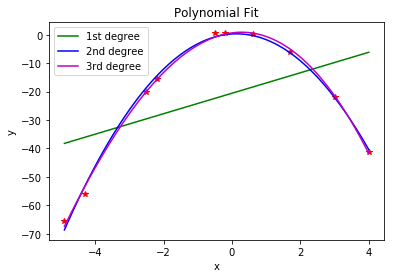

In [3]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r*')
axes.plot(xx,ny1,'g',label="1st degree")
axes.plot(xx,ny2,'b',label="2nd degree")
axes.plot(xx,ny3,'m',label="3rd degree")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();
axes.set_title('Polynomial Fit');

# Παράδειγμα 2

0.49914212118679896 0.08132500607904435 2.4573983882716676e-15


C:\Users\Admin\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


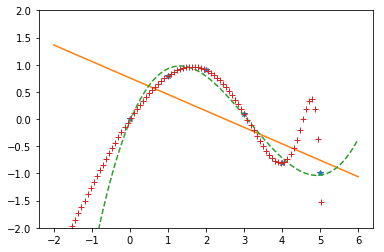

In [5]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
n=len(x)

xx= np.linspace(-2,6,100);

c1=np.polyfit(x,y,1);
ny1=np.polyval(c1,xx);
c2=np.polyfit(x,y,3);
ny2=np.polyval(c2,xx);
c3=np.polyfit(x,y,30);
ny3=np.polyval(c3,xx);

e1=np.sqrt( sum(abs(np.polyval(c1,x)-y)**2 )/n )
e2=np.sqrt( sum(abs(np.polyval(c2,x)-y)**2 )/n )
e3=np.sqrt( sum(abs(np.polyval(c3,x)-y)**2 )/n )

print (e1, e2, e3)

plt.plot(x, y, '*', xx, ny1, '-', xx, ny2, '--',xx, ny3, '+')
plt.ylim (-2, 2)
plt.show()

# Exercise 1

[-2.63562548  0.14364618  0.55144696  3.22294034 -0.43289427]


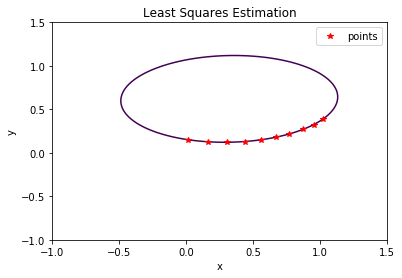

In [7]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])
n=len(x)

x2= x**2;
y2= y**2;
xy= x * y;

A= np.column_stack((y2, xy, x, y, [1]*n))
w= np.linalg.inv(np.transpose(A).dot(A) ).dot(np.transpose(A)).dot(x2)

print(w)

yy = np.linspace(-1,1.5,100)
xx = np.linspace(-1,1.5,100)

xx,yy = np.meshgrid(xx,yy)

Y = w[0]*(yy**2) + w[1]*xx*yy + w[2]*xx + w[3]*yy + w[4]
X = -xx**2

fig, axes = plt.subplots()
axes.set_title('Least Squares Estimation');
axes.plot(x,y,"r*", label="points")
axes.contour(xx,yy,(X+Y),[0])
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();

In [8]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=0, sd=1, low=-0.005, upp=0.005)

rand= X.rvs(10)
rand

array([-2.01362754e-03, -2.71597133e-03,  3.58683257e-03, -3.35074075e-03,
        1.02952092e-03, -3.27582905e-03, -3.93029004e-03,  4.80689913e-03,
        8.47058942e-05, -5.20103981e-04])

In [9]:
xrand=x+rand
yrand=y+rand

x2= xrand**2;
y2= yrand**2;
xy= xrand * yrand;

Arand=np.column_stack((y2, xy, xrand, yrand, [1]*n))
wrand= np.linalg.inv(np.transpose(Arand).dot(Arand) ).dot(np.transpose(Arand)).dot(x2)
print(wrand)

[-1.58060614 -0.51648122  0.65532359  3.30563421 -0.46791278]


In [10]:
estim1=sum((A.dot(w)-x)**2)
estim2=sum((Arand.dot(wrand)-x)**2)

print("MSE original: ",estim1)
print("MSE with noise: ",estim2)

print("The condition number of the system is: ",np.linalg.cond(A))

MSE original:  0.2792526859750848
MSE with noise:  0.28182326974696564
The condition number of the system is:  688.4294468693203


# Exercise 2

## Problem 1

In this problem, the goal is to estimate the function $f(x) = \frac{1}{1 + x^2}$. We will use three methods:
\begin{itemize}
    \item Normal Equations
    \item QR Decomposition
    \item Singular Value Decomposition
\end{itemize}

For the **Normal Equations** method we have:
$$Ax = b \Rightarrow$$
    
$$A^TAx = A^Tb \Rightarrow$$

$$(A^TA)^{-1}(A^TA)x = (A^TA)^{-1}A^Tb \Rightarrow$$

$$x = (A^TA)^{-1}A^Tb$$

This method, also known as the Ordinary Least Squares method, minimizes the sum of squared residuals.

**QR** is a decomposition of a matrix A into a product A = QR of an orthogonal matrix Q and an upper triangular matrix R. QR decomposition is often used to solve the linear least squares problem. Since Q is orthogonal, $Q^TQ = I$.

$$Ax = b \Rightarrow$$

$$QRx = b \Rightarrow$$

$$Rx = Q^Tb \Rightarrow$$

$$x = R^{-1}Q^Tb$$

In **Singular Value Decomposition**, any $m \times n$ matrix with $m \geq n$ can be decomposed as $ A = UWV^T$ where U has orthogonal columns $(U^TU = I)$ and V is orthonormal $(V^TV = I)$. W is a diagonal matrix composed by the eigenvalyes of A. SVD gets its name from the diagonal elements of W, which are called "Singular Values".

<img src="svd.png">

Thus, we can solve the linear system $Ax = b$ as follows:

$$Ax = b \Rightarrow$$

$$UWV^Tx = b \Rightarrow$$

$$WV^TAx = U^Tb \Rightarrow$$

$$V^TAx = W^{-1}U^Tb \Rightarrow$$

$$Ax = VW^{-1}U^Tb$$


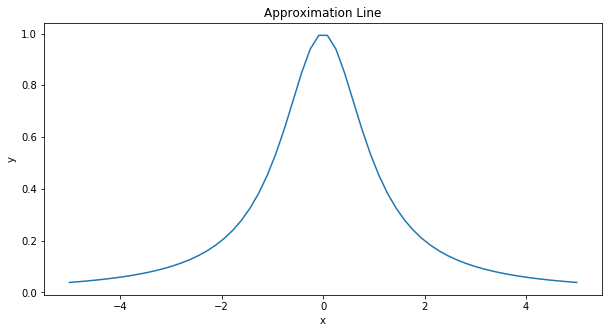

In [11]:
# x and y values of our function
xvals = np.linspace(-5,5,60)
yvals = 1/(1+xvals**2)

fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Approximation Line');

In [12]:
# Vandermode matrices generator 
A3=np.vander(xvals, 3)
A7=np.vander(xvals, 7)
A15=np.vander(xvals, 15)
A21=np.vander(xvals, 21)

# Ordinary least squares approach
w3= np.linalg.inv(np.transpose(A3).dot(A3) ).dot(np.transpose(A3)).dot(yvals)
w7= np.linalg.inv(np.transpose(A7).dot(A7) ).dot(np.transpose(A7)).dot(yvals)
w15= np.linalg.inv(np.transpose(A15).dot(A15) ).dot(np.transpose(A15)).dot(yvals)
w21= np.linalg.inv(np.transpose(A21).dot(A21) ).dot(np.transpose(A21)).dot(yvals)

MSE_w3 = (1/(xvals.size))*sum((yvals-A3.dot(w3))**2)
print(MSE_w3)

MSE_w7 = (1/(xvals.size))*sum((yvals-A7.dot(w7))**2)
print(MSE_w7)

MSE_w15 = (1/(xvals.size))*sum((yvals-A15.dot(w15))**2)
print(MSE_w15)

MSE_w21 = (1/(xvals.size))*sum((yvals-A21.dot(w21))**2)
print(MSE_w21)

MSE_LS = np.array([MSE_w3, MSE_w7, MSE_w15, MSE_w21])

0.037362615114918875
0.007819087967176496
0.00032310969133667814
2.7421288198066158e-05


In [13]:
# QR decomposition using numpy's qr function
Q3, R3 = np.linalg.qr(A3)
Q7, R7 = np.linalg.qr(A7)
Q15, R15 = np.linalg.qr(A15)
Q21, R21 = np.linalg.qr(A21)

# Linear system solution using QE decomposition
w3qr= np.linalg.inv(R3).dot(np.transpose(Q3)).dot(yvals)
w7qr= np.linalg.inv(R7).dot(np.transpose(Q7)).dot(yvals)
w15qr= np.linalg.inv(R15).dot(np.transpose(Q15)).dot(yvals)
w21qr= np.linalg.inv(R21).dot(np.transpose(Q21)).dot(yvals)

# MSE calculation for each degree
MSE_w3qr = (1/(xvals.size))*sum((yvals-A3.dot(w3qr))**2)
print(MSE_w3qr)

MSE_w7qr = (1/(xvals.size))*sum((yvals-A7.dot(w7qr))**2)
print(MSE_w7qr)

MSE_w15qr = (1/(xvals.size))*sum((yvals-A15.dot(w15qr))**2)
print(MSE_w15qr)

MSE_w21qr = (1/(xvals.size))*sum((yvals-A21.dot(w21qr))**2)
print(MSE_w21qr)

MSE_QR = np.array([MSE_w3qr, MSE_w7qr, MSE_w15qr, MSE_w21qr])

0.03736261511491887
0.007819087967176511
0.0003231096913366591
2.742112966556747e-05


In [14]:
# SVD decomposition
u3, s3, vh3 = np.linalg.svd(A3)
u7, s7, vh7 = np.linalg.svd(A7)
u15, s15, vh15 = np.linalg.svd(A15)
u21, s21, vh21 = np.linalg.svd(A21)

Sigma3 = np.zeros(A3.shape)
Sigma3[:3,:3] = np.diag(s3)
Sigma3_pinv = np.zeros(A3.shape).T
Sigma3_pinv[:3,:3] = np.diag(1/s3[:3])
Sigma3_pinv.round(3)

Sigma7 = np.zeros(A7.shape)
Sigma7[:7,:7] = np.diag(s7)
Sigma7_pinv = np.zeros(A7.shape).T
Sigma7_pinv[:7,:7] = np.diag(1/s7[:7])
Sigma7_pinv.round(3)

Sigma15 = np.zeros(A15.shape)
Sigma15[:15,:15] = np.diag(s15)
Sigma15_pinv = np.zeros(A15.shape).T
Sigma15_pinv[:15,:15] = np.diag(1/s15[:15])
Sigma15_pinv.round(3)

Sigma21 = np.zeros(A21.shape)
Sigma21[:21,:21] = np.diag(s21)
Sigma21_pinv = np.zeros(A21.shape).T
Sigma21_pinv[:21,:21] = np.diag(1/s21[:21])
Sigma21_pinv.round(3)

# Linear system solution using SVD decomposition
w3svd= vh3.T.dot(Sigma3_pinv).dot(u3.T).dot(yvals)
w7svd= vh7.T.dot(Sigma7_pinv).dot(u7.T).dot(yvals)
w15svd= vh15.T.dot(Sigma15_pinv).dot(u15.T).dot(yvals)
w21svd= vh21.T.dot(Sigma21_pinv).dot(u21.T).dot(yvals)

# MSE calculation
MSE_w3svd = (1/(xvals.size))*sum((yvals-A3.dot(w3svd))**2)
print(MSE_w3svd)

MSE_w7svd = (1/(xvals.size))*sum((yvals-A7.dot(w7svd))**2)
print(MSE_w7svd)

MSE_w15svd = (1/(xvals.size))*sum((yvals-A15.dot(w15svd))**2)
print(MSE_w15svd)

MSE_w21svd = (1/(xvals.size))*sum((yvals-A21.dot(w21svd))**2)
print(MSE_w21svd)

MSE_SVD = np.array([MSE_w3svd, MSE_w7svd, MSE_w15svd, MSE_w21svd])

0.03736261511491887
0.007819087967176506
0.00032310969133671625
2.7421129664430086e-05


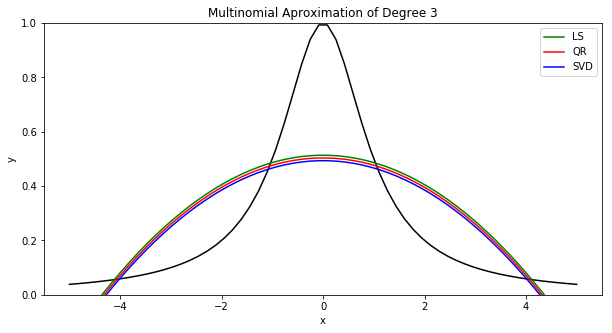

In [17]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A3.dot(w3)+0.01,'g',label="LS")
axes.plot(xvals,A3.dot(w3qr),'r',label="QR")
axes.plot(xvals,A3.dot(w3svd)-0.01,'b',label="SVD")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 1])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 3');

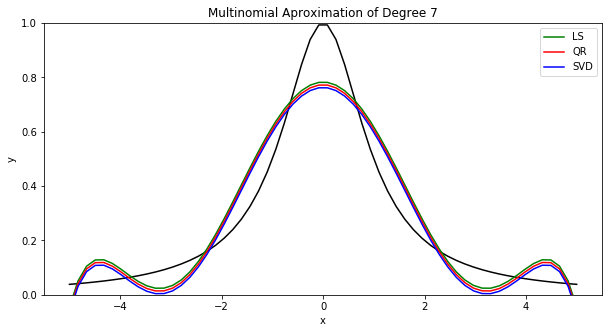

In [18]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A7.dot(w7)+0.01,'g',label="LS")
axes.plot(xvals,A7.dot(w7qr),'r',label="QR")
axes.plot(xvals,A7.dot(w7svd)-0.01,'b',label="SVD")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 1])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 7');

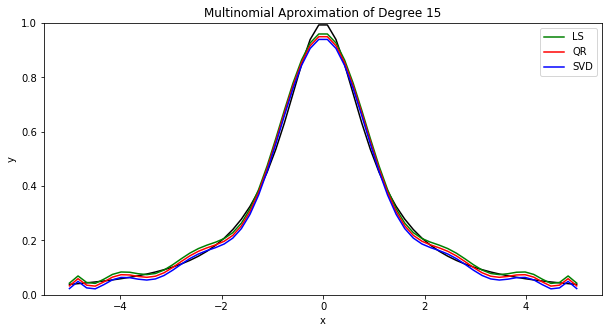

In [22]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A15.dot(w15)+0.01,'g',label="LS")
axes.plot(xvals,A15.dot(w15qr),'r',label="QR")
axes.plot(xvals,A15.dot(w15svd)-0.01,'b',label="SVD")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 1])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 15');

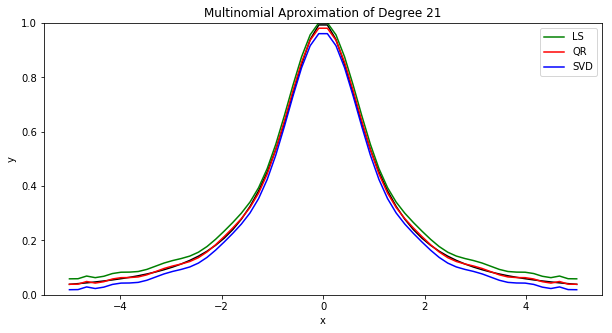

In [24]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A21.dot(w21)+0.02,'g',label="LS")
axes.plot(xvals,A21.dot(w21qr),'r',label="QR")
axes.plot(xvals,A21.dot(w21svd)-0.02,'b',label="SVD")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 1])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 21');

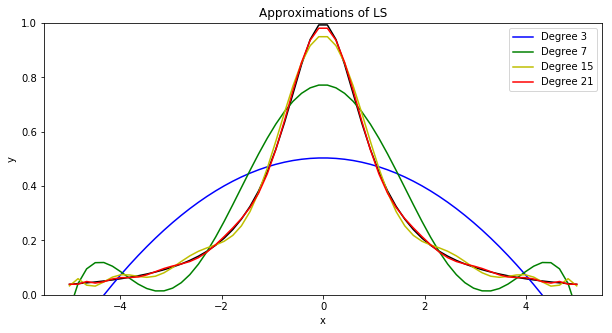

In [25]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A3.dot(w3),'b',label="Degree 3")
axes.plot(xvals,A7.dot(w7),'g',label="Degree 7")
axes.plot(xvals,A15.dot(w15),'y',label="Degree 15")
axes.plot(xvals,A21.dot(w21),'r',label="Degree 21")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 1])
axes.legend();
axes.set_title('Approximations of LS');

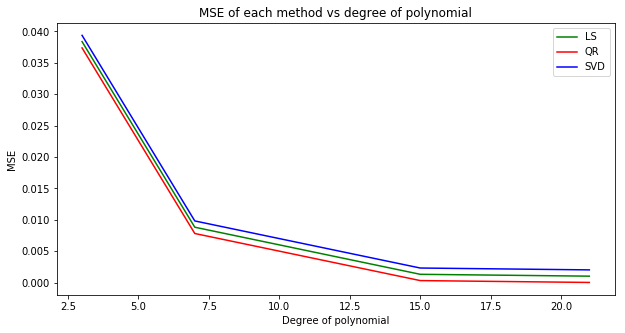

In [29]:
fig, axes = plt.subplots(figsize=(10,5))
x = np.array([3, 7, 15, 21])

axes.plot(x,MSE_LS + 0.001,'g',label="LS")
axes.plot(x, MSE_QR,'r',label="QR")
axes.plot(x, MSE_SVD + 0.002,'b',label="SVD")
axes.set_xlabel('Degree of polynomial')
axes.set_ylabel('MSE')
axes.legend();
axes.set_title('MSE of each method vs degree of polynomial');

## Problem 2

In [159]:
# Load dataframe
array = np.loadtxt(fname = "data.txt")

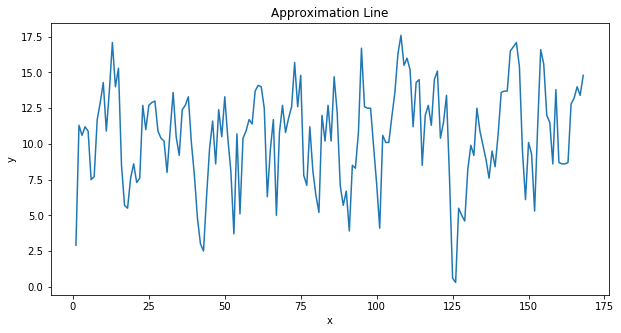

In [160]:
# Plot initial data
xvals = array[:,1]
yvals = array[:,0]

fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Approximation Line');

In [161]:
A3=np.vander(xvals, 3)
A7=np.vander(xvals, 7)
A15=np.vander(xvals, 15)
A21=np.vander(xvals, 21)

w3= np.linalg.inv(np.transpose(A3).dot(A3) ).dot(np.transpose(A3)).dot(yvals)
w7= np.linalg.inv(np.transpose(A7).dot(A7) ).dot(np.transpose(A7)).dot(yvals)
w15= np.linalg.inv(np.transpose(A15).dot(A15) ).dot(np.transpose(A15)).dot(yvals)
w21= np.linalg.inv(np.transpose(A21).dot(A21) ).dot(np.transpose(A21)).dot(yvals)

MSE_w3 = (1/(xvals.size))*sum((yvals-A3.dot(w3))**2)
print(MSE_w3)

MSE_w7 = (1/(xvals.size))*sum((yvals-A7.dot(w7))**2)
print(MSE_w7)

MSE_w15 = (1/(xvals.size))*sum((yvals-A15.dot(w15))**2)
print(MSE_w15)

MSE_w21 = (1/(xvals.size))*sum((yvals-A21.dot(w21))**2)
print(MSE_w21)

MSE_LS = np.array([MSE_w3, MSE_w7, MSE_w15, MSE_w21])


11.8056603593454
11.51458405331934
14.428276905962095
141.54952323091538


In [162]:
Q3, R3 = np.linalg.qr(A3)
Q7, R7 = np.linalg.qr(A7)
Q15, R15 = np.linalg.qr(A15)
Q21, R21 = np.linalg.qr(A21)

w3qr= np.linalg.inv(R3).dot(np.transpose(Q3)).dot(yvals)
w7qr= np.linalg.inv(R7).dot(np.transpose(Q7)).dot(yvals)
w15qr= np.linalg.inv(R15).dot(np.transpose(Q15)).dot(yvals)
w21qr= np.linalg.inv(R21).dot(np.transpose(Q21)).dot(yvals)

MSE_w3qr = (1/(xvals.size))*sum((yvals-A3.dot(w3qr))**2)
print(MSE_w3qr)

MSE_w7qr = (1/(xvals.size))*sum((yvals-A7.dot(w7qr))**2)
print(MSE_w7qr)

MSE_w15qr = (1/(xvals.size))*sum((yvals-A15.dot(w15qr))**2)
print(MSE_w15qr)

MSE_w21qr = (1/(xvals.size))*sum((yvals-A21.dot(w21qr))**2)
print(MSE_w21qr)

MSE_QR = np.array([MSE_w3qr, MSE_w7qr, MSE_w15qr, MSE_w21qr])

11.8056603593454
11.514584053319334
9.222428556033345
7.904402155127413


In [163]:
u3, s3, vh3 = np.linalg.svd(A3)
u7, s7, vh7 = np.linalg.svd(A7)
u15, s15, vh15 = np.linalg.svd(A15)
u21, s21, vh21 = np.linalg.svd(A21)

Sigma3 = np.zeros(A3.shape)
Sigma3[:3,:3] = np.diag(s3)
Sigma3_pinv = np.zeros(A3.shape).T
Sigma3_pinv[:3,:3] = np.diag(1/s3[:3])
Sigma3_pinv.round(3)

Sigma7 = np.zeros(A7.shape)
Sigma7[:7,:7] = np.diag(s7)
Sigma7_pinv = np.zeros(A7.shape).T
Sigma7_pinv[:7,:7] = np.diag(1/s7[:7])
Sigma7_pinv.round(3)

Sigma15 = np.zeros(A15.shape)
Sigma15[:15,:15] = np.diag(s15)
Sigma15_pinv = np.zeros(A15.shape).T
Sigma15_pinv[:15,:15] = np.diag(1/s15[:15])
Sigma15_pinv.round(3)

Sigma21 = np.zeros(A21.shape)
Sigma21[:21,:21] = np.diag(s21)
Sigma21_pinv = np.zeros(A21.shape).T
Sigma21_pinv[:21,:21] = np.diag(1/s21[:21])
Sigma21_pinv.round(3)

w3svd= vh3.T.dot(Sigma3_pinv).dot(u3.T).dot(yvals)
w7svd= vh7.T.dot(Sigma7_pinv).dot(u7.T).dot(yvals)
w15svd= vh15.T.dot(Sigma15_pinv).dot(u15.T).dot(yvals)
w21svd= vh21.T.dot(Sigma21_pinv).dot(u21.T).dot(yvals)

MSE_w3svd = (1/(xvals.size))*sum((yvals-A3.dot(w3svd))**2)
print(MSE_w3svd)

MSE_w7svd = (1/(xvals.size))*sum((yvals-A7.dot(w7svd))**2)
print(MSE_w7svd)

MSE_w15svd = (1/(xvals.size))*sum((yvals-A15.dot(w15svd))**2)
print(MSE_w15svd)

MSE_w21svd = (1/(xvals.size))*sum((yvals-A21.dot(w21svd))**2)
print(MSE_w21svd)

MSE_SVD = np.array([MSE_w3svd, MSE_w7svd, MSE_w15svd, MSE_w21svd])

11.805660359345401
11.514584053319329
9.222428479152445
7.901028098454931


In [164]:
Atrig=np.column_stack((np.cos(np.pi*xvals/3),np.sin( np.pi*xvals/3 ),np.sin(np.pi*xvals),[1]*len(yvals)))

trig= np.linalg.inv(np.transpose(Atrig).dot(Atrig) ).dot(np.transpose(Atrig)).dot(yvals)


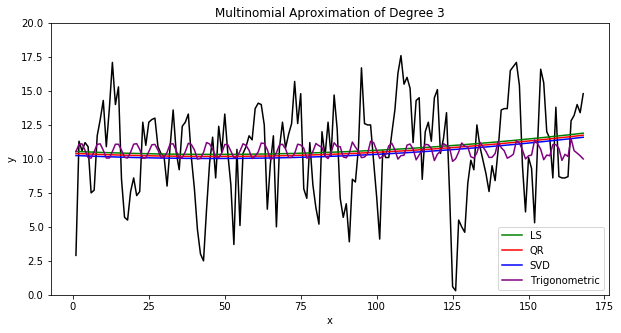

In [165]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A3.dot(w3)+0.15,'g',label="LS")
axes.plot(xvals,A3.dot(w3qr),'r',label="QR")
axes.plot(xvals,A3.dot(w3svd)-0.15,'b',label="SVD")
axes.plot(xvals,Atrig.dot(trig),'purple',label="Trigonometric")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 20])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 3');

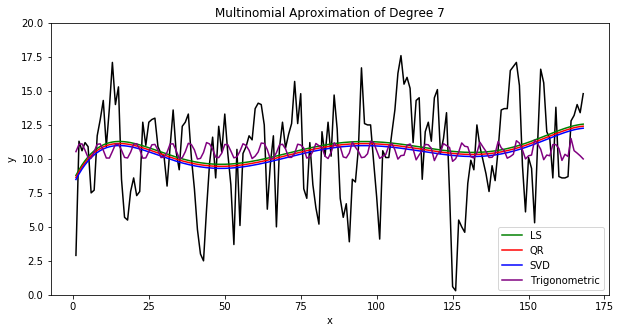

In [166]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A7.dot(w7)+0.15,'g',label="LS")
axes.plot(xvals,A7.dot(w7qr),'r',label="QR")
axes.plot(xvals,A7.dot(w7svd)-0.15,'b',label="SVD")
axes.plot(xvals,Atrig.dot(trig),'purple',label="Trigonometric")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 20])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 7');

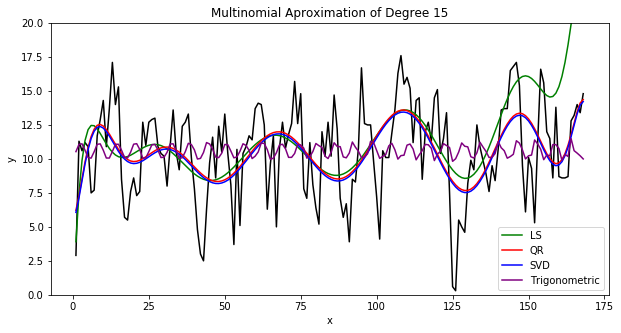

In [167]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A15.dot(w15),'g',label="LS")
axes.plot(xvals,A15.dot(w15qr),'r',label="QR")
axes.plot(xvals,A15.dot(w15svd)-0.15,'b',label="SVD")
axes.plot(xvals,Atrig.dot(trig),'purple',label="Trigonometric")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 20])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 15');

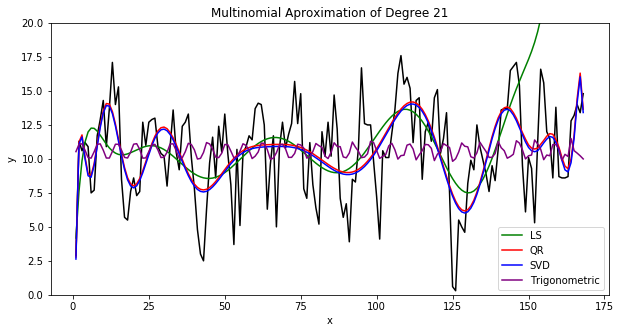

In [168]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A21.dot(w21),'g',label="LS")
axes.plot(xvals,A21.dot(w21qr),'r',label="QR")
axes.plot(xvals,A21.dot(w21svd)-0.15,'b',label="SVD")
axes.plot(xvals,Atrig.dot(trig),'purple',label="Trigonometric")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 20])
axes.legend();
axes.set_title('Multinomial Aproximation of Degree 21');

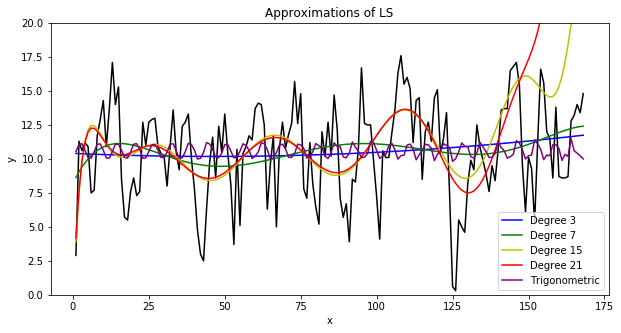

In [169]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(xvals, yvals, 'k')
axes.plot(xvals,A3.dot(w3),'b',label="Degree 3")
axes.plot(xvals,A7.dot(w7),'g',label="Degree 7")
axes.plot(xvals,A15.dot(w15),'y',label="Degree 15")
axes.plot(xvals,A21.dot(w21),'r',label="Degree 21")
axes.plot(xvals,Atrig.dot(trig),'purple',label="Trigonometric")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim([0, 20])
axes.legend();
axes.set_title('Approximations of LS');

Plotting the MSE values for each method vs the Degree of polynomial, we see that the Least Squares method has a slight tendency to increase its MSE until the 15-degree. After that threshold, the MSE sees a great increase. The QR and SVD methods show the same behavior (they are the same) and thus we plot the QR raised by one to make the line visible as we have done before. 

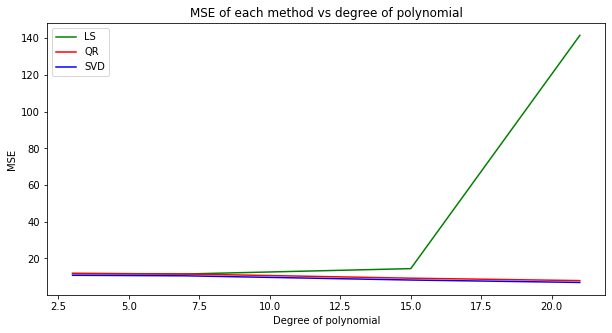

In [170]:
fig, axes = plt.subplots(figsize=(10,5))
x = np.array([3, 7, 15, 21])

#axes.plot(xvals, yvals, 'k')
axes.plot(x,MSE_LS ,'g',label="LS")
axes.plot(x, MSE_QR,'r',label="QR")
axes.plot(x, MSE_SVD-1,'b',label="SVD")
axes.set_xlabel('Degree of polynomial')
axes.set_ylabel('MSE')
axes.legend();
axes.set_title('MSE of each method vs degree of polynomial');

What follows is the trigonometric function's MSE.

In [171]:
MSE_trig = (1/xvals.size)*sum((yvals - Atrig.dot(trig))**2)

print("MSE of trigonometric function: ", MSE_trig)

MSE of trigonometric function:  11.822781156391832


## Problem  3

In [172]:
def calc_plot_residual_norm(x,y_true,y_pred,title):
    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax.bar(x, y_true-y_pred)
    ax.set_title(title)
    
    print("{0}: {1}".format(title,np.linalg.norm(yvals-y_pred)))

Residuals for degree 3 LS approximation: 44.534828397222185
Residuals for degree 7 LS approximation: 43.98238421183701
Residuals for degree 15 LS approximation: 49.23363200294726
Residuals for degree 21 LS approximation: 154.20868945294163


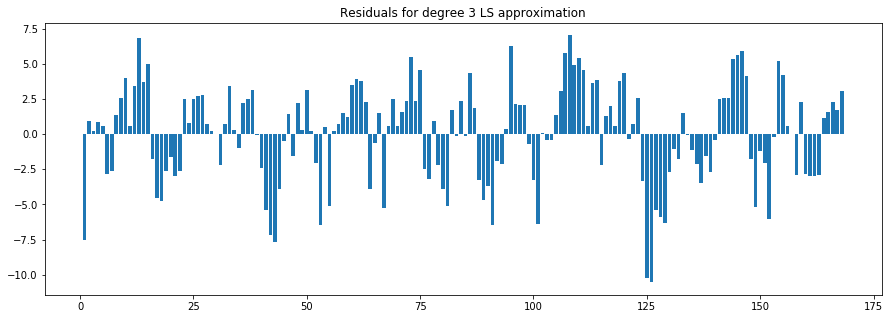

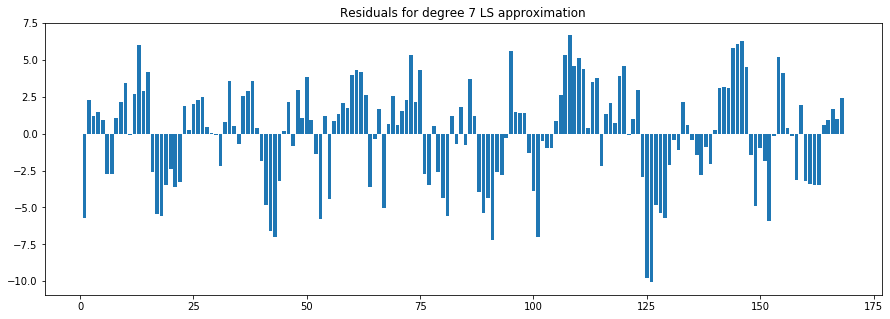

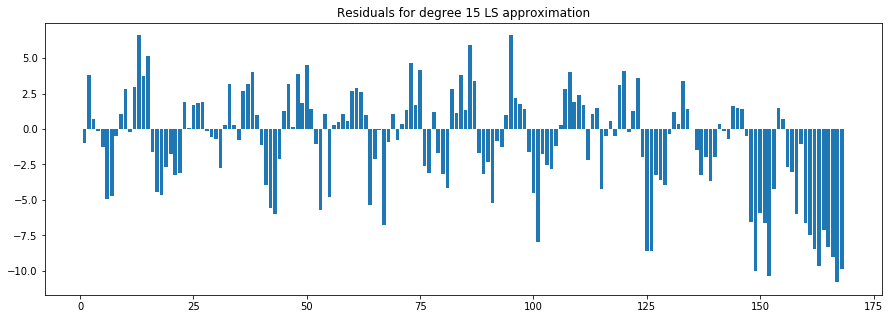

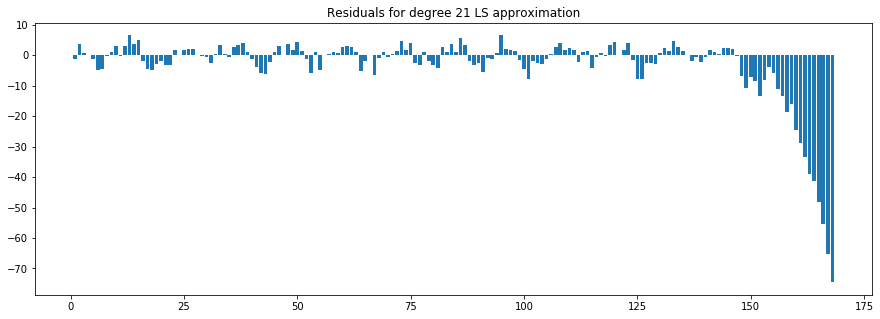

In [30]:
y_pred3_LS = A3.dot(w3)
y_pred7_LS = A7.dot(w7)
y_pred15_LS = A15.dot(w15)
y_pred21_LS = A21.dot(w21)
calc_plot_residual_norm(xvals,yvals,y_pred3_LS,title="Residuals for degree 3 LS approximation")
calc_plot_residual_norm(xvals,yvals,y_pred7_LS,title="Residuals for degree 7 LS approximation")
calc_plot_residual_norm(xvals,yvals,y_pred15_LS,title="Residuals for degree 15 LS approximation")
calc_plot_residual_norm(xvals,yvals,y_pred21_LS,title="Residuals for degree 21 LS approximation")

Residuals for degree 3 QR approximation: 44.534828397222185
Residuals for degree 7 QR approximation: 43.982384211837
Residuals for degree 15 QR approximation: 39.36201211083602
Residuals for degree 21 QR approximation: 36.440905066441545


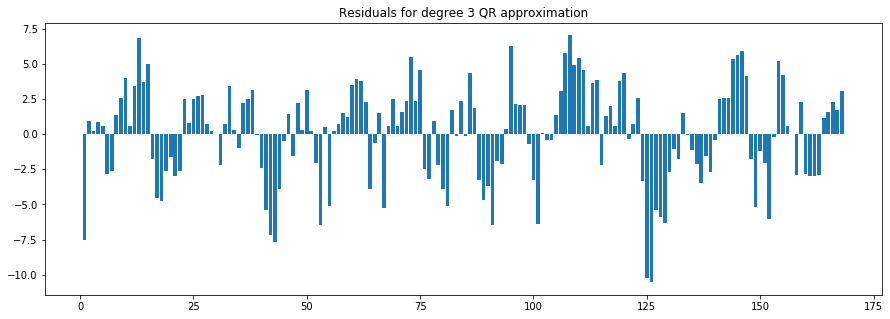

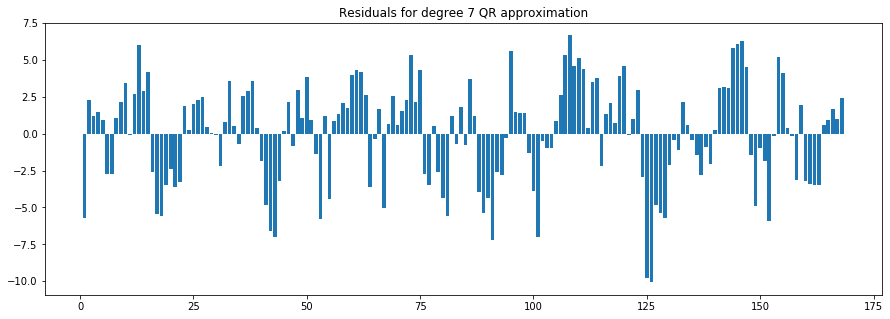

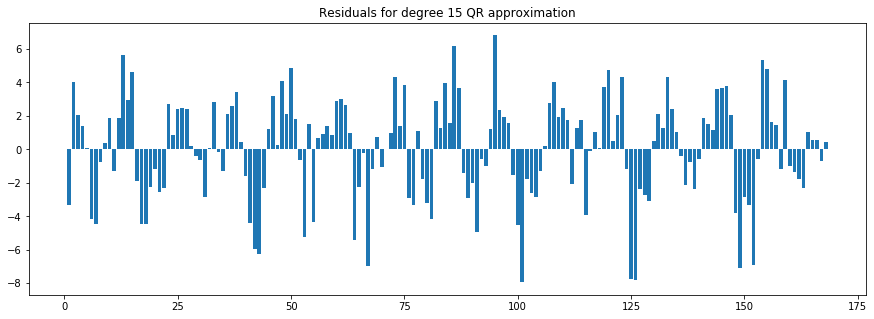

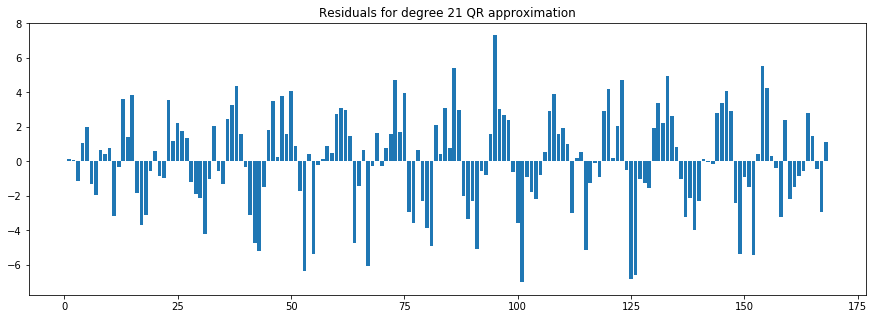

In [31]:
y_pred3_QR = A3.dot(w3qr)
y_pred7_QR = A7.dot(w7qr)
y_pred15_QR = A15.dot(w15qr)
y_pred21_QR = A21.dot(w21qr)
calc_plot_residual_norm(xvals,yvals,y_pred3_QR,title="Residuals for degree 3 QR approximation")
calc_plot_residual_norm(xvals,yvals,y_pred7_QR,title="Residuals for degree 7 QR approximation")
calc_plot_residual_norm(xvals,yvals,y_pred15_QR,title="Residuals for degree 15 QR approximation")
calc_plot_residual_norm(xvals,yvals,y_pred21_QR,title="Residuals for degree 21 QR approximation")

Residuals for degree 3 SVD approximation: 44.53482839722218
Residuals for degree 7 SVD approximation: 43.98238421183698
Residuals for degree 15 SVD approximation: 39.36201194676933
Residuals for degree 21 SVD approximation: 36.4331266917956


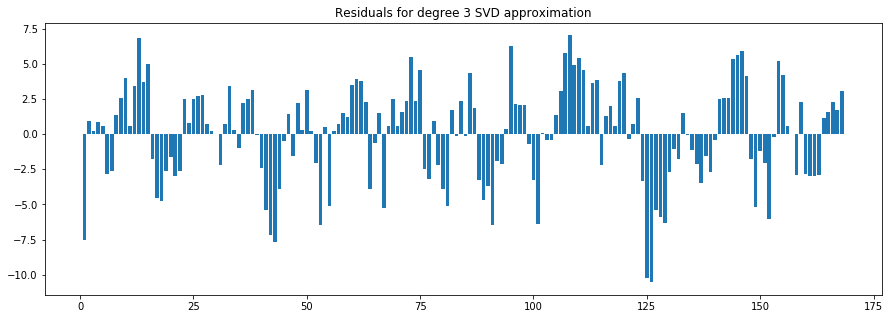

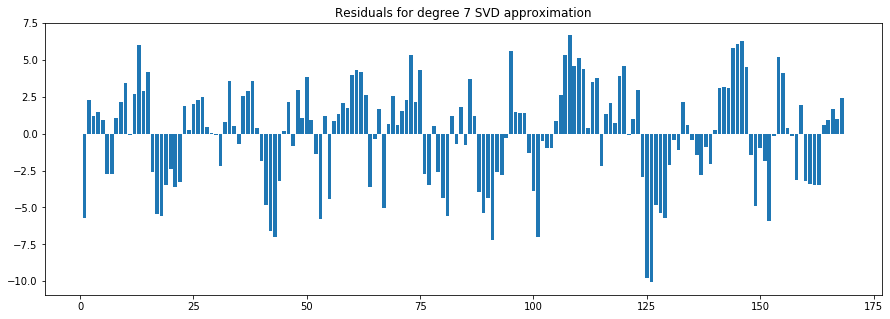

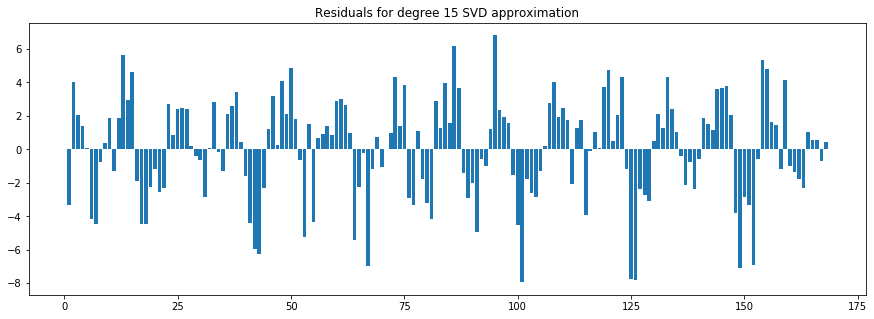

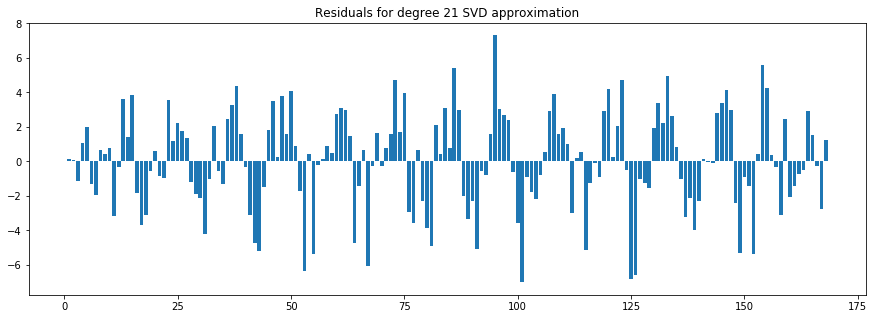

In [32]:
y_pred3_SVD = A3.dot(w3svd)
y_pred7_SVD = A7.dot(w7svd)
y_pred15_SVD = A15.dot(w15svd)
y_pred21_SVD = A21.dot(w21svd)
calc_plot_residual_norm(xvals,yvals,y_pred3_SVD,title="Residuals for degree 3 SVD approximation")
calc_plot_residual_norm(xvals,yvals,y_pred7_SVD,title="Residuals for degree 7 SVD approximation")
calc_plot_residual_norm(xvals,yvals,y_pred15_SVD,title="Residuals for degree 15 SVD approximation")
calc_plot_residual_norm(xvals,yvals,y_pred21_SVD,title="Residuals for degree 21 SVD approximation")

Residuals for trigonometric approximation: 44.567109332711134


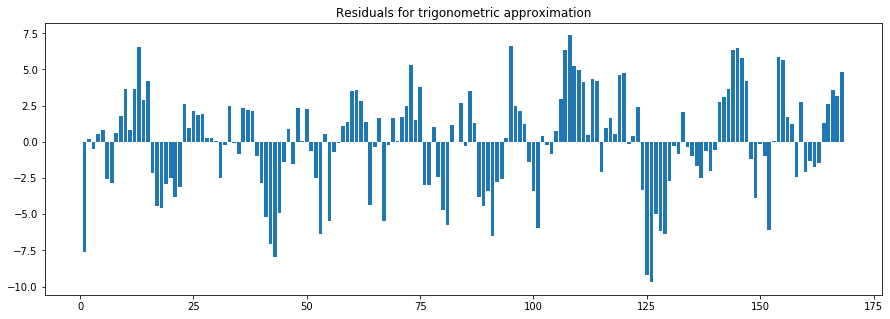

In [33]:
y_pred_trig = Atrig.dot(trig)
calc_plot_residual_norm(xvals,yvals,y_pred_trig,title="Residuals for trigonometric approximation")